<a href="https://colab.research.google.com/github/Robsrepo42/AudioAdScanner/blob/main/Batch_sort_files_and_convert_mp3_2_wav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We want to copy files and folders in Google drive - ideally using conditions

Helpful source Links:
https://medium.com/analytics-vidhya/a-simple-way-to-copy-entire-folders-in-google-drive-7eabd5426049


### Requirements

In [1]:
import sys
import os # interaction with Operating system
from glob import glob # UNIX Style pathname pattern extension

https://facelessuser.github.io/wcmatch/glob/ 

In [2]:
# after uploading the data to Google Drive it has to be mounted (usually autom):
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive
drive  sample_data


In [4]:
!ls # list files (and Folders) in current directory
%ls # list files (and Folders) in current directory in linux bash

drive  sample_data
drive/  sample_data/


In [5]:
# Setting the directory for the source mp3 audio files from region "nord" and date 3rd Dec.
source = './drive/MyDrive/Colab Notebooks/Audio Ad Scanner Project/RAW/nord/2020-12-03'
audio_files = glob(source + '/*.mp3') # defines Audio Files as the MP3s in the source directory
len(audio_files) # how many MP3s are in the source Dir?

288

### Filtering the commercial breaks audio files from all audio into separate files

In [ ]:
# Path that contains folder you want to copy using Linux command Line code. The "%" tells colab that it's a linux command
%cd /content/drive/MyDrive/Colab Notebooks/Audio Ad Scanner Project/RAW/nord/
#%ls # Zeige eine Liste aller Dateien im Verzeichnis an
%cp -av 2020-12-03/ TEST # kopiert den Ordner "2020-12-03" in den neu erzeugten Ordner "TEST"

### Converting MP3 to WAVes using PyDub
https://stackoverflow.com/questions/32073278/python-convert-mp3-to-wav-with-pydub

https://stackoverflow.com/questions/23730796/using-pydub-to-chop-up-a-long-audio-file

In [ ]:
!pip install pydub
import pydub

In [ ]:
from pydub import AudioSegment
AudioSegment.from_mp3("/content/drive/MyDrive/Colab Notebooks/Audio Ad Scanner Project/RAW/nord/2020-12-03/20201203-000000.mp3").export("/content/drive/MyDrive/Colab Notebooks/Audio Ad Scanner Project/RAW/nord/2020-12-03/20201203-000000.wav", format="wav")

<_io.BufferedRandom name='/content/drive/MyDrive/Colab Notebooks/Audio Ad Scanner Project/RAW/nord/2020-12-03/20201203-000000.wav'>

Loading a File using Librosa

In [ ]:
y, sr = librosa.load(audio_files[1])

### Loading a wave File (using WAVE) and extracting the audio data (tuple of time and amplitude (mono files)

In [ ]:
#audio=read("C:/Users/Martinez/Desktop/impulso.wav") # Reading a file from local disc
#print audio # print shows a tuple with the raw data of the audio file
spf = wave.open(audio_files[1], "r") # r probably means "read only" short 4 "rb"?

# extract raw audio from Wave-File
signal = spf.readframes(-1) # reading the audio's frames. The "-1" means that we want the last one
signal = np.fromstring(signal, "Int16") # this creates an numpy array from a string. The INT16 most likely means, that the step is defined as an INT lenght 16 (the sound file's resultion)
fs = spf.getframerate()     # I assume this is the sampling rate (per second)
print(fs)             # equals 44.100 here
# If Stereo
#if spf.getnchannels() == 2:
 #   print("Just mono files")
 #   sys.exit(0)

44100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


### Plotting the Wave data (time and amplitude)

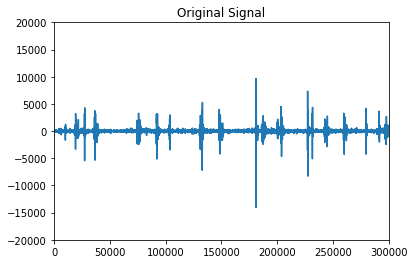

In [ ]:
plt.figure(1) # plot 1 figure (not 2 or three)
plt.xlim(0, 300000)   # range of x-axis values (from 0 to 300.000 (frames))
#plt.xlim(0, 441000)   # range of x-axis values (this would be = 10 secs)
plt.title("Original Signal") # give the plot a title
plt.ylim(-20000, 20000) # range of y-axis values (amplitude)
plt.plot(signal) # Plot the signal data
plt.show()

### Cutting frames out on conditions... or rather dropping frames and appending them on condition

In [ ]:
shelf = 7500 # well I guess this defines an amplitude limit (let's take 7500 here)
preClickEcho = 500 # I don't think this applies to a heartbeat
clickEcho = 1000 # same here - we will drop this later

trimmedSignal = [] # this I guess is where the result of the while loop goes
i = 0 # we start at the bottom (index = 0)
while i < len(signal): # as long a the framenumber is within the range of the singnal's length
    s = signal[i] # s is defined as the amplitude of the current frame "in the loop"
    if (-1 * shelf) < s > shelf: # if the amplitude is in the invervall of -shelf (7500) to shelf (7500)
            trimmedSignal = trimmedSignal[0:i - preClickEcho]
            i += clickEcho
            while i < len(signal) and (-1 * shelf) < signal[i] < shelf:
                i += 1
            i += clickEcho
    else: # if above conditions to the frame are not met
        trimmedSignal.append(s) # append the frame to the trimmed signal
        i += 1 # then go on to the next frame (restart the loop)

### Now compare the plots of the singal and the trimmed signal

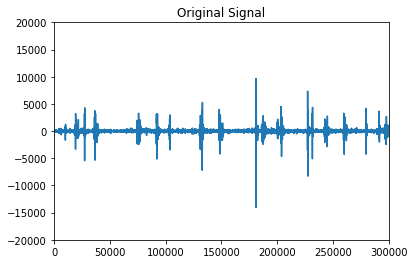

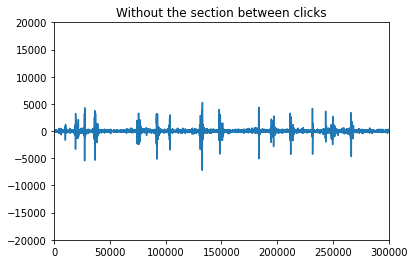

In [ ]:
plt.figure(1)
plt.xlim(0, 300000)
plt.title("Original Signal")
plt.ylim(-20000, 20000)
plt.plot(signal)


plt.figure(2)
plt.title("Without the section between clicks")
plt.plot(trimmedSignal)
plt.xlim(0, 300000)
plt.ylim(-20000, 20000)

plt.show()

In [ ]:
print("exporting to trimmed.wav")
outputFile = wave.open("trimmed.wav", "wb")
outputFile.setnchannels(spf.getnchannels())
outputFile.setframerate(spf.getframerate())
outputFile.setsampwidth(spf.getsampwidth())

#print(type(trimmedSignal))
outputFile.writeframes(np.array(trimmedSignal).tobytes())
outputFile.close()
print("done")

exporting to trimmed.wav
done


https://www.youtube.com/watch?v=KyP2a0Ms2-c
https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
https://docs.python.org/3/library/wave.html